FUENTE: https://www.cienciadedatos.net/documentos/pystats06-analisis-normalidad-python.html

PARA SABER QUE ES NORMALIDAD: https://economipedia.com/definiciones/distribucion-normal.html

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

Los datos utilizados en este ejemplo se han obtenido del libro Statistical Rethinking by Richard McElreath. El set 
de datos contiene información recogida por Nancy Howell a finales de la década de 1960 sobre el pueblo !Kung San, 
que viven en el desierto de Kalahari entre Botsuana, Namibia y Angola.

In [2]:
# Datos
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/' +
       'Estadistica-machine-learning-python/master/data/Howell1.csv')
datos = pd.read_csv(url)
print(datos.info())
datos.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB
None


,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1


In [3]:
#De todos los datos disponibles se seleccionan únicamente mujeres mayores de 15 años.
datos = datos[(datos.age > 15) & (datos.male ==0)]
peso = datos['weight']

In [4]:
datos.head()

,height,weight,age,male
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
4,145.415,41.276872,51.0,0
6,149.225,38.243476,32.0,0
8,147.955,34.869885,19.0,0


In [5]:
peso

1      36.485807
2      31.864838
4      41.276872
6      38.243476
8      34.869885
         ...    
529    39.405805
533    40.823280
534    47.031821
537    34.246196
541    54.062496
Name: weight, Length: 198, dtype: float64

# Método gráfico

Uno de los métodos gráficos más empleados para el análisis de normalidad consiste en representar los datos mediante un histograma y superponer la curva de una distribución normal con la misma media y desviación estándar que los datos disponibles.

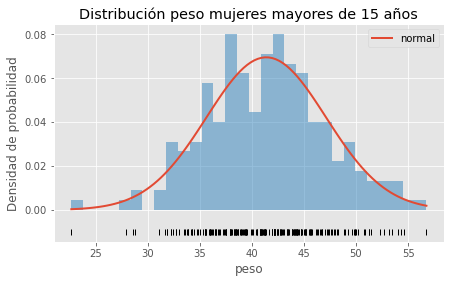

In [6]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(peso)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(peso), max(peso), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=peso, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(peso, np.full_like(peso, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución peso mujeres mayores de 15 años')
ax.set_xlabel('peso')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

Otra representación utilizada con frecuencia son los gráficos de cuantiles teóricos (Gráficos Q-Q). Estos gráficos comparan los cuantiles de la distribución observada con los cuantiles teóricos de una distribución normal con la misma media y desviación estándar que los datos. Cuanto más se aproximen los datos a una normal, más alineados están los puntos entorno a la recta.

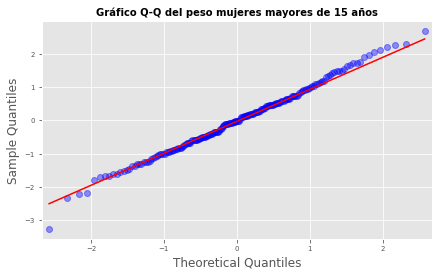

In [7]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    peso,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del peso mujeres mayores de 15 años', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

# Métodos analíticos asimetría y curtosis 

Los estadísticos de asimetría (Skewness) y curtosis pueden emplearse para detectar desviaciones de la normalidad. 
Un valor de curtosis y/o coeficiente de asimetría entre -1 y 1, es generalmente considerada una ligera desviación 
de la normalidad (Bulmer, 1979), (Brown, n.d.). Entre -2 y 2 hay una evidente desviación de la normal pero no extrema.

CURTOSIS

La curtosis es una medida estadística que determina el grado de concentración que presentan los valores de una 
variable alrededor de la zona central de la distribución de frecuencias. También es conocida como medida de apuntamiento.

Cuando medimos una variable aleatoria, por lo general, los resultados que tienen una mayor frecuencia son los que se sitúan 
en torno a la media de la distribución. Imaginemos la altura de los alumnos de una clase. Si la altura media de la clase es 
1,72 cm, lo más normal es que las alturas del resto de los alumnos estén en torno a este valor (con cierto grado de 
variabilidad, pero sin ser esta demasiado grande). Si esto sucede, se considera que la distribución de la variable aleatoria 
se distribuye con normalidad. Pero dada la infinidad de variables que se pueden medir, esto no siempre sucede así.

Existen algunas variables que presentan un mayor grado de concentración (menor dispersión) de los valores en torno a su 
media y otras, por el contrario, presentan un menor grado de concentración (mayor dispersión) de sus valores en torno a 
su valor central. Por tanto, la curtosis nos informa de lo apuntada (mayor concentración) o lo achatada (menor concentración)
que es una distribución.

CURTOSIS = 0 -> DISTRIB NORMAL
CURTOSIS > 0 -> LOS DATOS ESTÁN MUY CONCENTRADOS EN LA MEDIA
CURTOSIS >=3 -> En exceso de curtosis

COEFICIENTE DE ASIMETRÍA
asimetría=0: Distribución simétrica
asimetría>0: Distribución asimétrica a la derecha
asimetría<0: Distribución asimétrica a la izquierda

In [11]:
print('Kursotis o curtosis:', stats.kurtosis(peso))
print('Skewness o  simetría:', stats.skew(peso))

Kursotis o curtosis: 0.05524614843093811
Skewness o  simetría: 0.03212251428320214


# Consecuencias de la falta de normalidad

El hecho de no poder asumir la normalidad influye principalmente en los test de hipótesis paramétricos (t-test, anova,…) y 
en los modelos de regresión. Las principales consecuencias de la falta de normalidad son:
* Los estimadores mínimo-cuadráticos no son eficientes (de mínima varianza).
* Los intervalos de confianza de los parámetros del modelo y los contrastes de significancia son solamente aproximados y no exactos.

Los test estadísticos expuestos requieren que la población de la que procede la muestra tenga una distribución normal, 
no la muestra en sí. Si la muestra se distribuye de forma normal, se puede aceptar que así lo hace la población de origen. 
En el caso de que la muestra no se distribuya de forma normal pero se tenga certeza de que la población de origen sí lo hace, 
entonces, puede estar justificado aceptar los resultados obtenidos por los contrastes paramétricos como válidos.

https://economipedia.com/definiciones/curtosis.html